# **Experiment**: Scaling of the error rates for Algorithm 3.1

In [1]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentB2.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentB2.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

In [2]:
# Experiment parameters
img_size = 129  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 1  # [2,1,0] # number of times mesh refinement
snr = 1 / 16  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs =  2048  # [512, 1024, 2048, 4096, 8192]
# lambda0 = 1/3000 * img_size**2
lambda0 =  1/50 * img_size**2  # works just fine for 16_129

max_iter = 1

# Directly start experiment
exp = Exp()

exp.begin(prefix="expB2" , postfix="SNR{}_L{}_N{}_lam{}_r{}".format(int(1/snr),img_size,num_imgs, int(lambda0),mr_repeat))
exp.dbglevel(4)

2022-02-21 14:41:26,903 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expB2_22-02-21_14-41-26_SNR16_L129_N2048_lam332_r1


In [3]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
results_dir = "results"
results_folder = "expB2_22-02-18_14-34-48_SNR16_L129_N2048_lam166_r1"
results_path = os.path.join("..", "..", "..", "..",results_dir,results_folder)

In [4]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

# TODO run experiment for repeat in mr_repeat
run_experiment(exp=exp,
               max_iter=1,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               mr_repeat=mr_repeat,
               rots_reg_param=lambda0,
               data_path=data_path,
               )

2022-02-21 14:41:26,923 INFO Start Experiment
2022-02-21 14:41:26,925 INFO Running Experiment for SNR = 0.0625 and 2048 images
2022-02-21 14:41:26,926 INFO This experiment illustrates orientation refinement using a lifting approach
2022-02-21 14:41:26,928 INFO Initialize simulation object and CTF filters.
2022-02-21 14:41:26,929 INFO Load 3D map and downsample 3D map to desired grids of 129 x 129 x 129.
2022-02-21 14:41:27,681 INFO Use downsampled map to creat simulation object.
2022-02-21 14:41:27,707 INFO Get true rotation angles generated randomly by the simulation object.
2022-02-21 14:41:31,007 INFO Trying NFFT backend finufft
2022-02-21 14:41:31,019 INFO NFFT backend finufft usable.
2022-02-21 14:41:31,020 INFO Trying NFFT backend cufinufft
2022-02-21 14:41:31,025 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2022-02-21 14:41:31,026 INFO Trying NFFT backend pynfft
2022-02-21 14:41:31,028 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2022-02-21

2022-02-21 14:51:53,956 INFO Start Postprocessing
2022-02-21 14:51:53,958 INFO Postprocessing started


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 1.0000000000000018
2022-02-21 14:51:57,149 INFO Substituting symbol X from STIXNonUnicode
2022-02-21 14:51:57,160 INFO Substituting symbol X from STIXNonUnicode


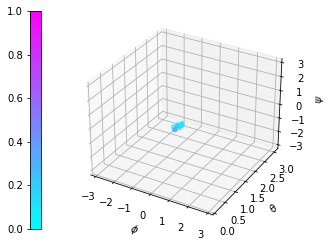

2022-02-21 14:51:57,474 INFO Substituting symbol X from STIXNonUnicode
2022-02-21 14:51:57,483 INFO Substituting symbol X from STIXNonUnicode


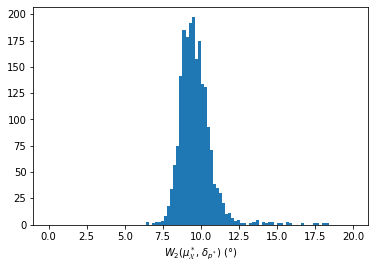

2022-02-21 14:51:57,662 INFO Substituting symbol X from STIXNonUnicode
2022-02-21 14:51:57,672 INFO Substituting symbol X from STIXNonUnicode
2022-02-21 14:51:58,072 INFO Substituting symbol X from STIXNonUnicode
2022-02-21 14:51:58,082 INFO Substituting symbol X from STIXNonUnicode


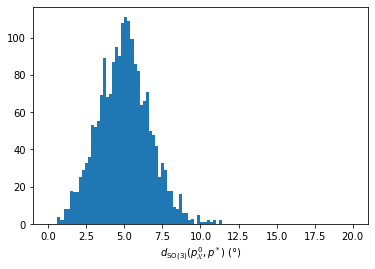

2022-02-21 14:51:58,275 INFO Substituting symbol X from STIXNonUnicode
2022-02-21 14:51:58,286 INFO Substituting symbol X from STIXNonUnicode
2022-02-21 14:51:58,468 INFO Substituting symbol X from STIXNonUnicode
2022-02-21 14:51:58,476 INFO Substituting symbol X from STIXNonUnicode


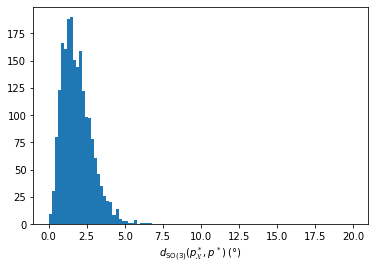

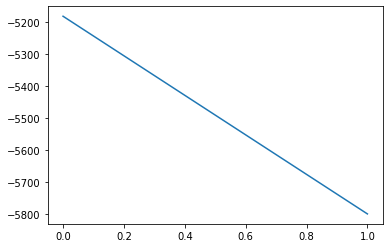

costs = [-5181.734115567771, -5800.555699286433]


In [5]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
                mr_repeat=mr_repeat,
                hist_range=20,
#                 results_folder=results_path #?
               )

